<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/Intro_to_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents


## Setup
<a href=#numpy&list>Numpy and lists</a>

<a href=#iteration>Iteration</a>

<a href=#pandas>Importing data with Pandas</a>

<a href=#inspect>Data inspection</a>

<a href=#plot>Data plotting</a>

<a href=#regression>OLS Regression</a>

# Setup

Welcome to Econ 475 (Economic forecasting). In this course, we will be using Python to learn basic plotting, regression analysis, and forecasting techniques. 

Google Colab is a free web-based interactive Python platform based off of Jupyter Notebook, and implements many commonly used Python packages. Nothing is required for local installation and you can save a copy of this file to your Google Drive and starting working your way through this tutorial. 

We will start with the basics assuming no background in coding or Python specifically.

Python comes with built-in functions that you can call arguments in the following way:

```
function(arg1, arg2, arg3...)
```
where ```function``` is the name of the function calling, ```arg1```, ```arg2``` and ```arg3``` are provided to the function. Depending on the design of the function, it can take no argument or many. 


In [ ]:
print("Hello world!")

Hello world!


## Numpy and lists<a name='numpy&list'></a>
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful in our course. 

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
    print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
    print("Index: {}, was: {}".format(i, e))

Current array: ['Hello' 'World' '!']
Printing each element
Hello
World
!

Printing each element and their index
Index: 0, was: Hello
Index: 1, was: World
Index: 2, was: !


In [ ]:
print("Showing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

Showing some basic math on arrays
Max: 4
Average: 2.0
Max index: 2


In [ ]:
print("You can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

You can print the type of anything
Type of b: <class 'numpy.ndarray'>, type of b[0]: <class 'numpy.int64'>


In [ ]:
print("Use numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

Use numpy to create a [3,3] dimension array with random number
[[0.88240503 0.36016245 0.39831008]
 [0.85898581 0.50480363 0.84981733]
 [0.14232914 0.16707367 0.10145081]]


In [ ]:
print("You can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

You can print the dimensions of arrays
Shape of a: (3,)
Shape of b: (5,)
Shape of c: (3, 3)
...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists


## Iteration <a name='iteration'></a>

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
    print(i)

print("Iterate over an actual list.")
for i in [0,1]:
      print(i)

print("While works")
i = 0
while i < 2:
    print(i)
    i += 1

Iterate over the items. `range(2)` is like a list [0,1].
0
1
Iterate over an actual list.
0
1
While works
0
1


In [ ]:
print("Python supports standard key words like continue and break")
while True:
    print("Entered while")
    break

Python supports standard key words like continue and break
Entered while


## Importing/Exporting Data with Pandas<a name='pandas'></a>

Pandas is a popular Python package that provides fast, powerful, flexible and easy to use open source data analysis and manipulation tool.

In the following sections, we will demonstrate how to import and export data from/to Microsoft Excel Spreadsheet and comma-seperated value (CSV) file. This is usually the first step in data analysis.

In [ ]:
import pandas as pd

Data is read into a DataFrame object using Pandas for easy manipulation. Let's call it ```df```.

In [ ]:
df = pd.read_excel("https://github.com/shihanxie/Econ475/blob/main/data/intro.xlsx?raw=true")

## Data Inspection <a name='inspect'></a>
- How many rows are in the dataset?
- How many columns are in this dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? Do we have to infer values?
- What is the definition of these columns?
- What are some other caveats to the data?

In [ ]:
# look at data
display(df.head())

,Date,GDP,Inflation,Interest rate
0,1963-01-01,3.59786,1.22896,3.892131
1,1963-04-01,3.82214,1.03684,3.963651
2,1963-07-01,4.81691,1.36384,4.032031
3,1963-10-01,5.15826,1.39346,4.118197
4,1964-01-01,6.21584,1.48748,4.178689


In [ ]:
# look a shape of data
display(df.shape)

(231, 4)

In [ ]:
# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

Date             datetime64[ns]
GDP                     float64
Inflation               float64
Interest rate           float64
dtype: object

In [ ]:
# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

Date             False
GDP              False
Inflation        False
Interest rate    False
dtype: bool

In [ ]:
# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,GDP,Inflation,Interest rate
count,231.000000,231.000000,231.000000
mean,2.930650,3.819028,6.089847
std,2.368456,2.830920,2.948367
min,-9.032780,-1.606960,0.650625
25%,1.801315,1.939245,4.075114
50%,3.067140,3.074670,5.898548
75%,4.320485,4.625915,7.743110
85%,4.959095,6.026735,8.786525
95%,6.333295,10.650595,11.857586
99%,8.322529,12.847318,14.064324


## Plot my data <a name='plot'></a>
- There does appear to be an overall increasing trend. 
- There appears to be some differences in the variance over time. 
- There may be some seasonality (i.e., cycles) in the data.
- Not sure about outliers.

We need to use a plotting package to plot our data. Here we are using ```matplotlib``` to illustrate this. 

In [ ]:
import matplotlib.pyplot as plt

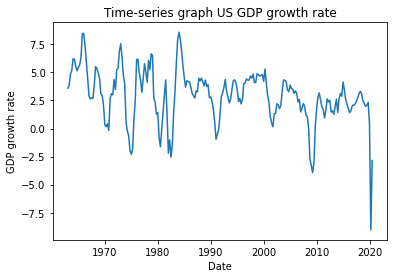

In [ ]:
# Plot time series data
f, ax = plt.subplots(1,1)
ax.plot(df['Date'], df['GDP'])

# Add title
ax.set_title('Time-series graph US GDP growth rate')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 0)

# Label x-axis
ax.set_xlabel('Date')

# Label y-axis
ax.set_ylabel('GDP growth rate')

# Show graph
plt.show()
plt.close()

We can overlay multiple time-series datasets. Note we can also customize the linestyle in ```ax.plot()``` function. You can type ```?plt.plot``` or go to matplotlib webpage to read more. 

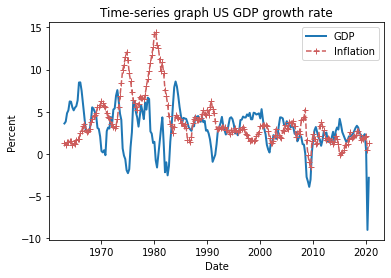

In [ ]:
# Plot GDP time series data
f, ax = plt.subplots(1,1)
ax.plot(df['Date'], df['GDP'], lw='2', label = 'GDP')

# Plot inflation time series data
ax.plot(df['Date'], df['Inflation'], marker = '+', ls= '--', c='indianred', label='Inflation')

# Add title
ax.set_title('Time-series graph US GDP growth rate')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 0)

# Label x-axis
ax.set_xlabel('Date')

# Label y-axis
ax.set_ylabel('Percent')

# Show legend
ax.legend()

# Show graph
plt.show()
plt.close()

### Exercise
Plot interest rate time series. You can also customize the style of plot to your taste. You can also try to show individual data points as well. 

If you're up for a challenge, try iteratively plot GDP, inflation and interest rate altogher!

### Histograms and Scatter plots
- We start by generating a sample of 100 observations of ```(y,x)``` such that ```y = 10 + 1.5x + u``` and ```u ~ N(0,2)```
- Histogram displays the sample distribution of our data
- Scatter plot displays the relationship between two variables

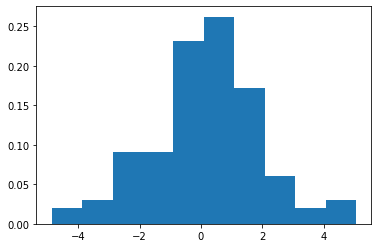

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate sample
np.random.seed(1) # by setting the seed we will generate the same sample in every trial
x = np.random.uniform(-3,4,100)
u = 2*np.random.randn(100)
y = 10 + 1.5*x + u

# plot histogram
fig = plt.hist(u, density=1, bins = 10)

In [ ]:
# scatter plot
plt.figure(figsize=(8,6))
plt.plot(x,y,'+')
plt.ylabel("y")
plt.xlabel("x")
plt.title('Scatter plot of y versus x')

plt.savefig('reg_scatter.pdf')

## OLS Regression <a name='regression'></a>
- Suppose that we have data on three random variables ```x```, ```y``` and ```z``` and we are interested in forecasting ```y``` based on ```x``` and ```z```
- We want to find a linear function that best fits the data points, which can be achived by minimizing the squared errors between the data points and the fitted values by the linear function
- This strategy is called ordinary least squares (OLS). We often say we run a regression, run OLS, or fit a regression line.
- In the following example, we start by generating a sample of 100 observations of ```(y,x,z)``` such that ```y = 10 + 2x - 0.6z + u``` and ```u ~ N(0,2)```

In [ ]:
np.random.seed(1)
x = 1 + 4*np.random.randn(100)
z = -2 + 3*np.random.randn(100)
u = 2*np.random.randn(100)
y = 10 + 2*x - 1.6*z + 2*u

- We need to use a statistical package to run OLS. Here we are using ```statsmodels``` to illustrate this.

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [ ]:
x_reg = add_constant(np.array([x,z]).T,prepend=True)
result=sm.OLS(y,x_reg).fit()
result.model.data.xnames=['C','x','z']
print(result.summary())

### Exercise
- Generating a sample of 200 observations of ```(y,x,z)``` such that ```y = 5 + 3x - 2z + u``` and ```u ~ N(0,1)```
- Regress ```y``` on ```x```, ```z``` and a constant 